# ADAPTATION OPTIONS APPRAISAL IN SAN SALVADOR

Demographic and economic growth as well as climate change will perturb the risk estimate obtained in [San Salvador Risk](San_Salvador_Risk.ipynb) over the following years. In this section we will consider a plausible future scenario and see how it will affect the region of study. Moreover, we will define household adaptation measures and estimate their cost-benefit relation.

## ENTITY IN 2015

A climada entity contains the socio-economic parameters for a fixed year. These are: exposures, impact functions, adaptation measures and discount rates for the following years. `FL_entity_Acelhuate_houses.xlsx` contains the entity of 2015:

2019-07-30 20:53:03,672 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
2019-07-30 20:53:11,286 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2019-07-30 20:53:11,287 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-07-30 20:53:11,287 - climada.entity.exposures.base - INFO - meta metadata set to default value: None
2019-07-30 20:53:11,288 - climada.entity.exposures.base - INFO - centr_ not set.
2019-07-30 20:53:11,289 - climada.entity.exposures.base - INFO - category_id not set.
2019-07-30 20:53:11,289 - climada.entity.exposures.base - INFO - region_id not set.
2019-07-30 20:53:11,290 - climada.entity.exposures.base - INFO - geometry not set.
Total value in 2015: 1.836e+08
2019-07-30 20:53:11,295 - climada.util.coordinates - INFO - Raster from resolution 9.99999999891088e-05 to 9.99999999891088e-05.


/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


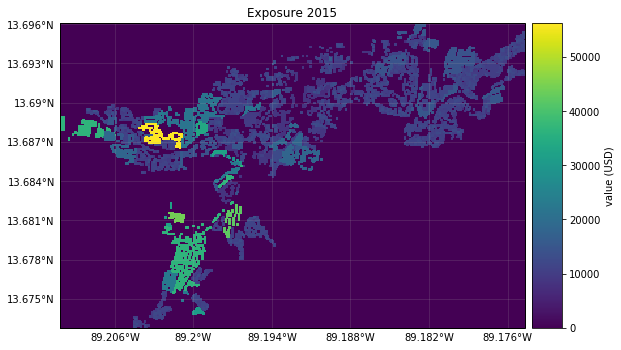

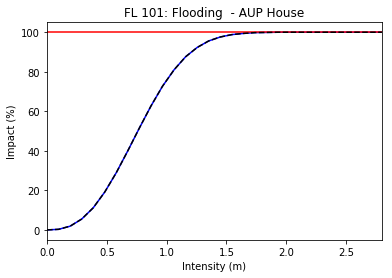

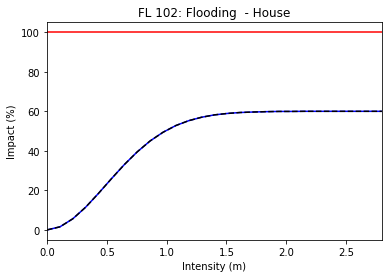

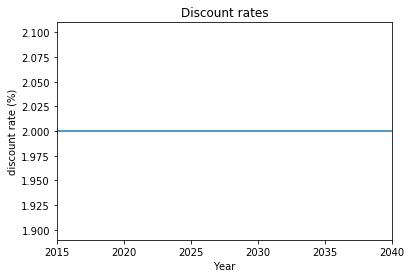

In [1]:
%matplotlib inline
from climada.entity import Entity

ent_2015 = Entity()
ent_2015.read_excel('FL_entity_Acelhuate_houses.xlsx')
ent_2015.exposures.ref_year = 2015 # fix reference year
ent_2015.check()

# Exposures: the ones we used in San Salvador Risk script
print('Total value in 2015: {:.3e}'.format(ent_2015.exposures.value.sum()))
ax = ent_2015.exposures.plot_raster(raster_f=lambda x:x, label='value (USD)')
ax.set_title('Exposure 2015')

# Impact Functions: the ones we used in San Salvador Risk script
ent_2015.impact_funcs.get_func('FL', 101).plot()
ent_2015.impact_funcs.get_func('FL', 102).plot()

# Discount rate: 2% yearly discount year until 2040
ent_2015.disc_rates.plot()

# Adaptation measures: we'll look at them later in this script

## ENTITY IN 2040: MODERATE ECONOMIC GROWTH

In 2014 the economic activity had increased 2% in the metropolitan area of San Salvador. The sectors that grew faster were housing and service (4%), insurance and banking (3.4%), communal services (3.2%) and the hotel and restaurant industry (3.2%). We will fix a conservative discount rate of 2% in this analysis. The construction type will remain the same, meaning that the impact functions don't change.

2019-07-30 20:53:15,040 - climada.entity.exposures.base - INFO - centr_ not set.
2019-07-30 20:53:15,041 - climada.entity.exposures.base - INFO - category_id not set.
2019-07-30 20:53:15,041 - climada.entity.exposures.base - INFO - region_id not set.
2019-07-30 20:53:15,043 - climada.entity.exposures.base - INFO - geometry not set.
Total value in 2040: 3.072e+08
2019-07-30 20:53:15,046 - climada.util.coordinates - INFO - Raster from resolution 9.99999999891088e-05 to 9.99999999891088e-05.


Text(0.5, 1.0, 'Exposure 2040')

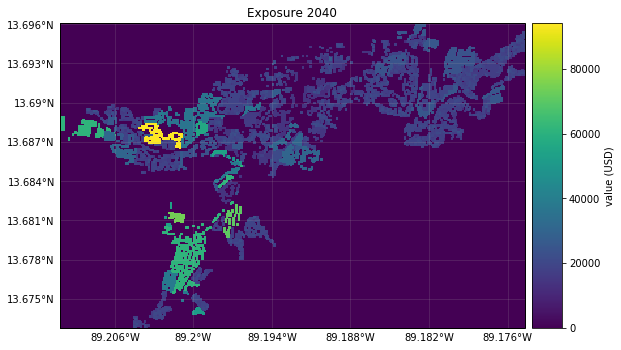

In [2]:
import copy

# same entity as in 2015
ent_2040 = copy.deepcopy(ent_2015)

# Exposures: yearl economic growth of 2% in exposures
ent_2040.exposures.ref_year = 2040
growth = 0.02
ent_2040.exposures['value'] = ent_2040.exposures.value.values*(1 + growth)**(ent_2040.exposures.ref_year - ent_2015.exposures.ref_year + 1)
ent_2040.check() # check values are well set and assignes default values

print('Total value in 2040: {:.3e}'.format(ent_2040.exposures.value.sum()))
ax = ent_2040.exposures.plot_raster(raster_f=lambda x:x, label='value (USD)')
ax.set_title('Exposure 2040')

## HAZARD IN 2015

The flood models at 2015 are the same as the ones used in [San Salvador Risk](San_Salvador_Risk.ipynb). These are gathered in climada's Hazard class:

2019-07-30 20:53:18,300 - climada.hazard.base - INFO - Reading Salvador_hazard_FL_2015.mat
2019-07-30 20:53:18,349 - climada.hazard.centroids.centr - INFO - Reading Salvador_hazard_FL_2015.mat


/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


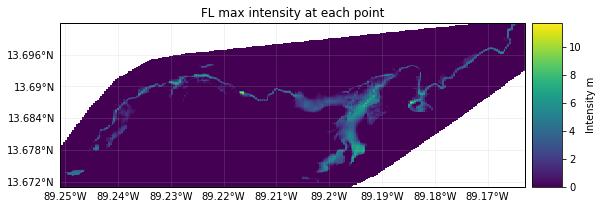

In [3]:
# flood as for 2015
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2015.mat'

haz_2015 = Hazard('FL')     # set hazard type
haz_2015.read_mat(HAZ_FILE) # load file
haz_2015.plot_intensity(0)  # maximum intensity reached at each point

## HAZARD IN 2040: EXTREME CLIMATE CHANGE

Future projections of climate change reported by 2015 disturb the frequency of precipitation between -16% and 5%. As a consequence, flood could increae 10% in an extreme climate change scenario as represented in the following model:

2019-07-30 20:53:22,608 - climada.hazard.base - INFO - Reading Salvador_hazard_FL_2040_extreme_cc.mat
2019-07-30 20:53:22,654 - climada.hazard.centroids.centr - INFO - Reading Salvador_hazard_FL_2040_extreme_cc.mat


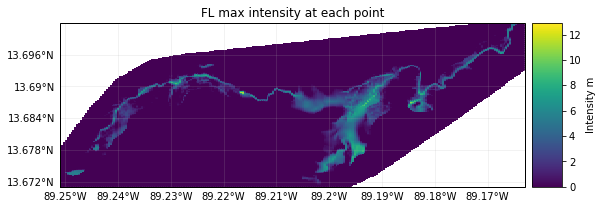

In [4]:
# flood as for 2040 with extreme climate change
from climada.hazard import Hazard

HAZ_FILE = 'Salvador_hazard_FL_2040_extreme_cc.mat'

haz_2040 = Hazard('FL')     # set hazard type
haz_2040.read_mat(HAZ_FILE) # load file
haz_2040.plot_intensity(0)  # maximum intensity reached at each point

## FUTURE EXPECTED FLOOD DAMAGE

The following graph shows the expected annual loss that is going to be generated by Acelhuate's floodings in the region of study of San Salvador.

In 2015 the expected annual impact is 3.56 millions USD. In 2040 socio-economic development will increase the risk by 2.40 millions USD and climate change by 1.62 millions, obtaining an expected annual impact of 7.58 millions USD (more than doubled with respect to 2015).

2019-07-30 20:53:26,636 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2019-07-30 20:53:28,784 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:28,796 - climada.entity.exposures.base - INFO - Matching 12472 exposures with 153222 centroids.
2019-07-30 20:53:31,213 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:31,232 - climada.engine.cost_benefit - INFO - Risk at 2015: 3.563e+06
2019-07-30 20:53:31,233 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:31,235 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:31,248 - climada.engine.cost_benefit - INFO - Risk with development at 2040: 5.962e+06
2019-07-30 20:53:31,249 - climada.engine.cost_benefit - INFO - Risk with development and climate change at 2040: 7.578e+06


Text(0.5, 1.0, 'Expected Annual Impact')

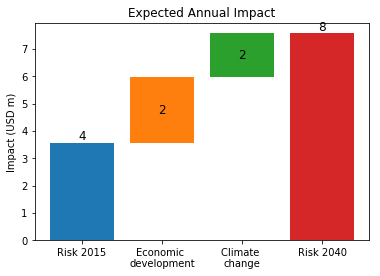

In [5]:
# expected annual impact
from climada.engine import CostBenefit

cb_acel = CostBenefit()
ax = cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040)
ax.set_title('Expected Annual Impact')

If we look at the exceeded impact for a given return period (instead of expected annual impact), the numbers change considerably. The risk metric used in CLIMADA can be changed using its defined risk functions as follows:

2019-07-30 20:53:31,467 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:31,470 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:31,483 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:31,485 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:31,511 - climada.engine.cost_benefit - INFO - Risk at 2015: 4.913e+07
2019-07-30 20:53:31,512 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:31,515 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:31,531 - climada.engine.cost_benefit - INFO - Risk with development at 2040: 8.221e+07
2019-07-30 20:53:31,531 - climada.engine.cost_benefit - INFO - Risk with development and climate change at 2040: 1.113e+08


Text(0.5, 1.0, 'Impact Exceedance at 100 years Return Period')

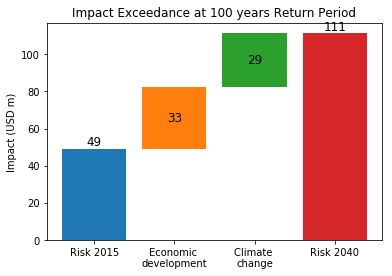

In [6]:
# exceeded impact for 100 years return periods
from climada.engine import risk_rp_100

cb_acel = CostBenefit()
ax = cb_acel.plot_waterfall(haz_2015, ent_2015, haz_2040, ent_2040, risk_func=risk_rp_100)
ax.set_title('Impact Exceedance at 100 years Return Period')

## COST AND BENEFIT OF ADAPTATION OPTIONS

Some of the damages could be averted by implementing adaptation measures. We are going to analyse several measures that could be implemented at household level. These tend to be profitable, but of low impact.

The measure `No descargas en Lluvia` defines that every inhabitant of the region avoids discharging the toilet while raining. They should understand that any liquid flowing through the pipes of the houses goes down through the pipes of the city, by ravines and by rivers, sometimes lakes, to the sea. In its path it contaminates and floods, specially during the hours of heavy rain where the streets are inundated. The costs of this measure includes an education program, summing up to a net present value of 41,894 USD. 

Measure cost 4.189e+04 USD
2019-07-30 20:53:31,671 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,673 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,674 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,675 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,675 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,676 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,678 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:31,679 - climada.entity.measures.base - DEBUG - Cutting events whose damage have a frequency > 0.2.
2019-07-30 20:53:31,680 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:31,683 - climada.engine.impact - INFO - Calculating damage for 

/Users/aznarsig/anaconda3/envs/climada_env/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


Text(0.5, 1.0, 'Maximumm reduced intensity with measure')

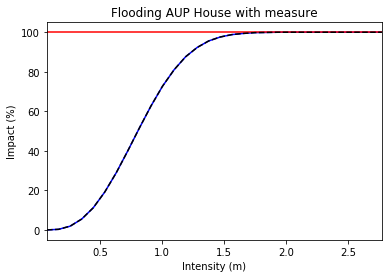

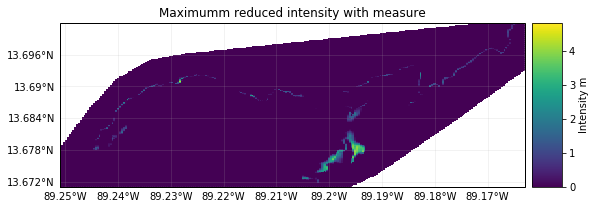

In [7]:
# Measure impact in 2015: No descargas en Lluvia
meas = ent_2015.measures.get_measure('FL', 'No descargas en Lluvia')
print('Measure cost {:.3e} USD'.format(meas.cost))
meas_exp_2015, meas_if_2015, meas_haz_2015 = meas.apply(ent_2015.exposures, ent_2015.impact_funcs, haz_2015)

# exposures stay the same

# impact functions slightly improved:
ax = meas_if_2015.get_func('FL', 101).plot()
ax.set_title('Flooding AUP House with measure')

# flood reduced up to 4.8 meters in worst events:
import numpy as np
haz_diff = copy.deepcopy(haz_2015)
haz_diff.intensity = (haz_2015.intensity - meas_haz_2015.intensity)
ax = haz_diff.plot_intensity(0) # maximum intensity difference at each point
ax.set_title('Maximumm reduced intensity with measure')

We will estimate the cost-benefit ratio of the following household measures. `Benefit` refers to the total averted damage when the measure is applied from 2015 to 2040, whilst `cost` refers to the implementation and maintance costs of the measure until 2040 (and has therefore been discounted to 2015).

In [8]:
# name of every considered measure
for meas in ent_2040.measures.get_measure('FL'): # measures related to flood (FL)
    print(meas.name)

Sanitarios de descarga Dual
Ahorradores en Agua en casas
No descargas en Lluvia
Reuso de agua de enjuage
Puentes sin basura
Captacion de agua de techos


2019-07-30 20:53:36,516 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:36,519 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:36,532 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,533 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,534 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,534 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,535 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,536 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,538 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:36,538 - climada.entity.measures.base - DEBUG - Cutting events whose damage have a frequency > 

2019-07-30 20:53:37,158 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:37,159 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:37,161 - climada.entity.measures.base - DEBUG - Cutting events whose damage have a frequency > 0.2.
2019-07-30 20:53:37,162 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:37,165 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:37,241 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:37,243 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:37,258 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:37,259 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:37,260 - climada.entity.measures.base - DEBUG - Tr

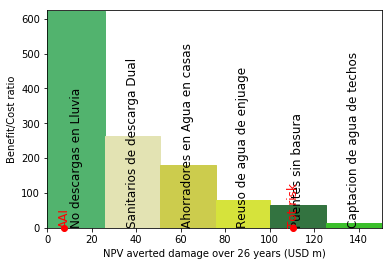

In [9]:
cb_acel = CostBenefit()
cb_acel.calc(haz_2015, ent_2015, haz_2040, ent_2040) # compute
cb_acel.plot_cost_benefit() # plot benefit/cost ratio per measure


All the options avert a similar quantity of damage and result profitable (benefit/cost ratio is greater than 1 in all the cases). However, the most profitable is almost 45 times more cost-effective than the least. That's the `No descargas en Lluvia` measure.


We can also represent the total amount of damage expected from 2015 to 2040, and the total quantity that can be averted using adaptation measures. From 2015 until 2040, if the exposure and the hazard remain the same as today, and considering the dicount rates of `ent_2015.disc_rates`, a total amount of 73 millions USD would be damaged. If we consider the moderate socio-economic growth and extreme climate change described previously, there would be an expected total loss of 111 millions USD. 22 m USD of these would be caused by the economic growth and 15 m by climate change.

2019-07-30 20:53:37,997 - climada.engine.cost_benefit - INFO - Current total risk at 2040: 7.312e+07
2019-07-30 20:53:37,998 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:38,001 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:38,015 - climada.engine.cost_benefit - INFO - Total risk with development at 2040: 9.556e+07
2019-07-30 20:53:38,016 - climada.engine.cost_benefit - INFO - Total risk with development and climate change at 2040: 1.107e+08


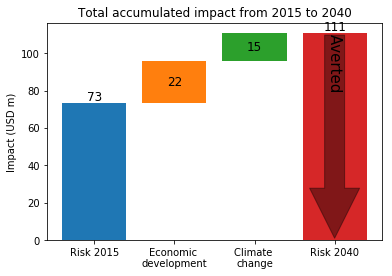

In [10]:
cb_acel.plot_waterfall_accumulated(haz_2015, ent_2015, ent_2040)

The accumulated damages are obtained by adding the expected annual damages (or the selected risk function) from 2015 to 2040 (included). In the case of climate change and economic development, the expected annual damage by 2040 has increased with respect to the one of 2015. Assuming that the growth in annual expected damage happens linearly from 2015 to 2040, we obtain a total damage of 111 m USD by 2040. However, if the growth follows a sublinear or superlinear curve, the total amount of loss changes (take into account that the discounting is computed as well).

Importing Jupyter notebook from functions_ss.ipynb


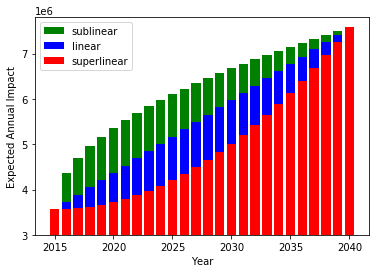

In [11]:
# show difference between sublinear, linear and superlinear expected annual damage growth
import nbimporter
import functions_ss
functions_ss.non_linear_growth(cb_acel)

2019-07-30 20:53:38,583 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:38,586 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:38,601 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,602 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,602 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,604 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,604 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,606 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,607 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:38,608 - climada.entity.measures.base - DEBUG - Cutting events whose damage have a frequency > 

2019-07-30 20:53:39,242 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:39,244 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:39,245 - climada.entity.measures.base - DEBUG - Cutting events whose damage have a frequency > 0.2.
2019-07-30 20:53:39,246 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:39,249 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:39,335 - climada.engine.impact - INFO - Exposures matching centroids found in centr_FL
2019-07-30 20:53:39,336 - climada.engine.impact - INFO - Calculating damage for 12472 assets (>0) and 6 events.
2019-07-30 20:53:39,352 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:39,353 - climada.entity.measures.base - DEBUG - Transforming impact functions.
2019-07-30 20:53:39,353 - climada.entity.measures.base - DEBUG - Tr

2019-07-30 20:53:39,914 - climada.engine.cost_benefit - INFO - Total risk with development and climate change at 2040: 1.243e+08


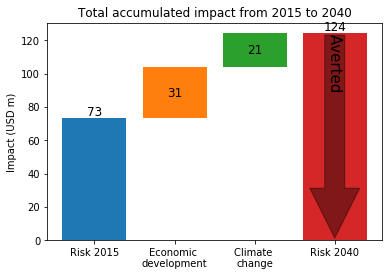

In [12]:
# change growth
growth_fact = 0.5 # < 1: sublinear, >1: superlinear
cb_acel_sub = CostBenefit()
cb_acel_sub.calc(haz_2015, ent_2015, haz_2040, ent_2040, imp_time_depen=growth_fact)
cb_acel_sub.plot_waterfall_accumulated(haz_2015, ent_2015, ent_2040, imp_time_depen=growth_fact)


Whilst the implementation of all the measures could avert the total expected damage, this doesn't mean that they could avert the damages of events with high return period. Following the same color code as in the previous cost-benefit figure, the following figure shows the averted damage per return period of floods. Most of those damages are not averted:

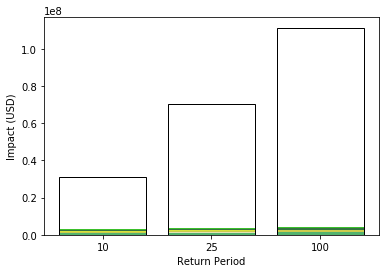

In [13]:
cb_acel.plot_event_view()